Analyize DeepLabCut Data

In [24]:
import pandas as pd

df = pd.read_csv('/Users/nathanyeelee/Documents/GitHub/JFlab-analysis/data/joseph_data/M13 - C2   2DLC_Resnet50_OPM_073025_CPPJul30shuffle100_detector_200_snapshot_080_filtered.csv', header=[1,2])
df.drop(columns=[col for col in df.columns if col[1]=='likelihood'], inplace=True)

print(df.head())

  bodyparts       body            top_border           bottom_border  \
     coords          x          y          x         y             x   
0         0  135.02843  111.46610  201.44293  95.92379     201.16070   
1         1  135.40071  111.54927  201.61906  96.07007     201.75801   
2         2  135.89474  111.54927  202.12335  96.07007     201.75801   
3         3  135.89474  111.54927  202.16072  95.92379     201.77493   
4         4  135.92915  111.62588  202.31494  95.80152     201.97658   

              
           y  
0  159.42436  
1  159.42776  
2  159.62796  
3  159.42776  
4  159.42776  


In [26]:
def euclidean_distance(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

body_x = df[('body', 'x')]
body_y = df[('body', 'y')]
top_left_x = df[('top_border', 'x')]
top_left_y = df[('top_border', 'y')]
top_right_x = df[('bottom_border', 'x')]
top_right_y = df[('bottom_border', 'y')]

box_length_cm = 14.5 # Distance in cm equal to distance from top left to top right 
box_length_pixel = euclidean_distance(top_left_x, top_left_y, top_right_x, top_right_y)

cm_pixel_ratio = box_length_cm / box_length_pixel

print(box_length_pixel)

0        63.501197
1        63.357842
2        63.558940
3        63.505142
4        63.627140
           ...    
28568    64.083658
28569    64.016819
28570    64.016819
28571    63.976613
28572    64.503047
Length: 28573, dtype: float64


0         NaN
1    0.011760
2    0.046962
3    0.029085
4    0.007216
dtype: float64


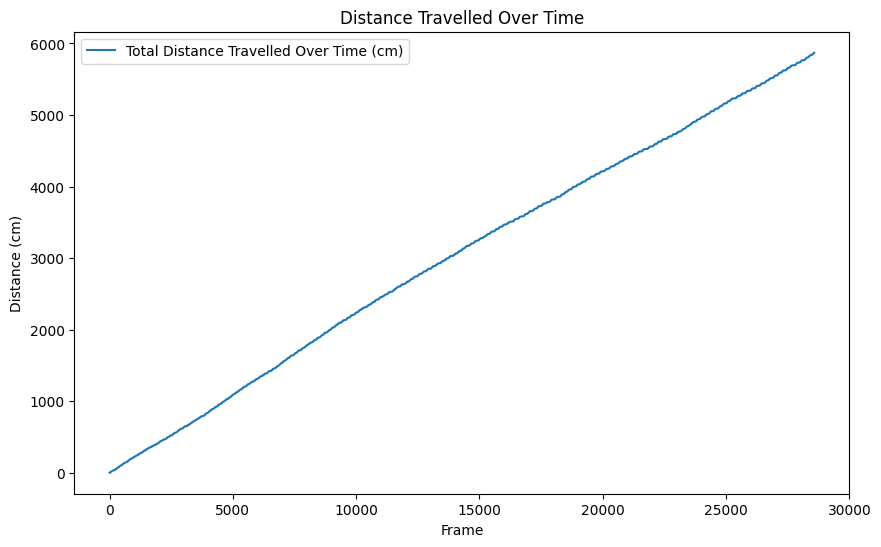

Mouse travelled a total of 5870.94 cm.


In [ ]:
import numpy as np

dist_top_left = euclidean_distance(body_x, body_y, top_left_x, top_left_y)
dist_top_left_cm = dist_top_left * cm_pixel_ratio  # Distance from top left to body in cm

distance_travelled = abs(dist_top_left_cm.diff())
total_distance_travelled = np.cumsum(distance_travelled)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_distance_travelled, label='Total Distance Travelled Over Time (cm)')
plt.title('Distance Travelled Over Time')
plt.xlabel('Frame')
plt.ylabel('Distance (cm)')
plt.show()

print(f"Mouse travelled a total of {round(total_distance_travelled.iloc[-1], 2)} cm.")

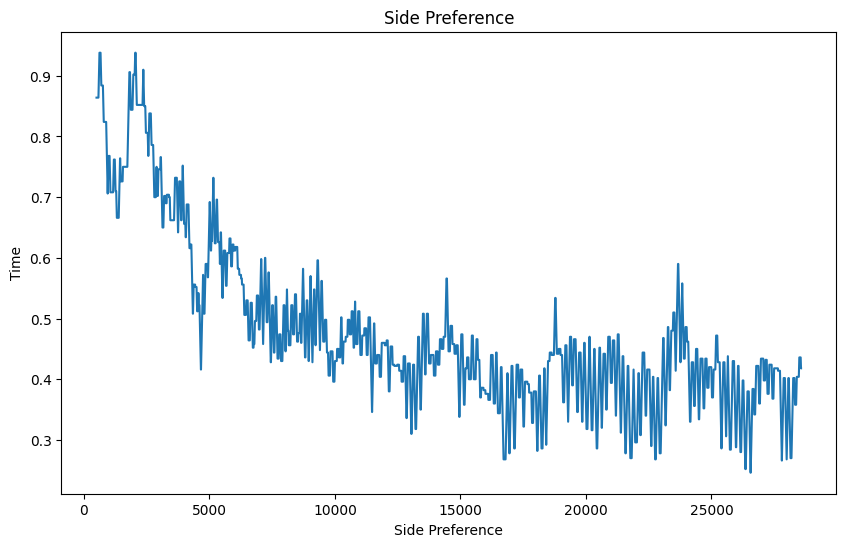

In [55]:
dist_top_right = euclidean_distance(body_x, body_y, top_right_x, top_right_y)
dist_top_right_cm = dist_top_right * (box_length_cm / box_length_pixel)

side_preference = pd.Series(np.where(dist_top_left_cm > dist_top_right_cm, 0, 1)) # Left = 0, Right = 1
side_preference_rolling = side_preference.rolling(window=500).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=side_preference_rolling)
plt.title('Side Preference')
plt.xlabel('Side Preference')
plt.ylabel('Time')
plt.show()

In [40]:
speed = total_distance_travelled[::-1].diff().abs()
threshold = 0.05
stability_window = 100  # if mouse stays still for this many frames, then it is considered dead
counter = 0

for index in speed.index[1:-1]:
    counter += 1

    if speed[index:index+stability_window].mean() > threshold:
        if counter > stability_window:
            print(f"Mouse is dead at frame {index}")
        else:
            print(f"Mouse stayed alive for entire video, no death detected")
            
        break

Mouse stayed alive for entire video, no death detected
